# Step 1 : Loading data and printing some sample images from the training set

`torchvision.transforms.Compose` ใช้สำหรับรวมลำดับของการแปลง (transforms) หลาย ๆ ขั้นตอนให้เป็นกระบวนการเดียว  โดยที่แต่ละการแปลงจะถูกประมวลผลตามลำดับที่กำหนด

Ex.

```python
# รวมการแปลง
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # ย่อรูปภาพ
    transforms.ToTensor(),          # แปลงเป็น Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# ใช้การแปลงกับภาพ
transformed_image = transform(image)  # ทำทั้ง 3 ขั้นตอนในครั้งเดียว
```

ลำดับการทำงานจะเป็นไปทีละขั้นตอนจากบนลงล่าง
* Resize ทำงานก่อน → ได้ภาพที่ถูกย่อขนาด
* ส่งผลลัพธ์ของ Resize ไปให้ ToTensor → ได้ Tensor
* ส่งผลลัพธ์ของ ToTensor ไปให้ Normalize → ได้ Tensor ที่ Normalize แล้ว

<hr>

`torchvision.transforms.Normalize((0.5), (0.5))` จะปรับค่า Tensor ให้เปลี่ยนจาก [0.0, 1.0] เป็น [-1.0, 1.0]

**สูตร : mormalized value = value - mean / std**

เมื่อ mean = 0.5 และ std = 0.5
* ค่า 0.0 -> 0.0 - 0.5 / 0.5 = -1.0
* ค่า 1.0 -> 1.0 - 0.5 / 0.5 = 1.0

<hr>

`torchvision.datasets.MNIST` เป็นคลาสสำหรับโหลดชุดข้อมูล

<hr>

`torch.utils.data.DataLoader` ใช้จัดการกับชุดข้อมูลที่โหลดมา โดยแบ่งข้อมูลออกเป็นชุดย่อยๆ (batch size) ให้พร้อมสำหรับใช้งานในกระบวนการฝึกและทดสอบโมเดล
* โหลดข้อมูลเป็น batch: แบ่งข้อมูลขนาดใหญ่ออกเป็นชุดย่อยๆ
* จัดเรียงลำดับของข้อมูล: กำหนดให้สุ่มลำดับข้อมูล (shuffle) หรือไม่

Ex.

```python
train_loader = torch.utils.data.DataLoader(
	train_dataset, # ชุดข้อมูลสำหรับฝึก (train dataset)
  batch_size=256) # ขนาดของแต่ละ batch คือ 256 ตัวอย่าง
```

**วิธีการทำงาน**

1. แบ่งข้อมูลเป็น batch: แทนที่จะโหลดข้อมูลทั้งชุดในครั้งเดียว จะโหลดทีละชุดย่อยตามขนาด batch_size

Ex. ข้อมูลภาพ 60,000 รูป

กำหนดขนาด batch size = 256

จำนวน batch = 60,000 / 256 ≈ 234 batch

ดังนั้นใน 1 รอบการเทรน จะส่งข้อมูลภาพไปยังโมเดล 234 ครั้ง แต่ละครั้งจะมีรูปภาพ 256 รูป

NOTE : 234 * 256 = 59,904 รูปภาพ ส่วนที่เหลือ จะถูกเติมเป็นอีก 1 batch หรืออาจถูกละทิ้ง ขึ้นอยู่กับการตั้งค่า

2. จัดรูปแบบข้อมูล

ข้อมูลแต่ละ batch จะอยู่ในรูปแบบของ Tensor ขนาด [batch_size, C, H, W]
* batch_size=256 คือจำนวนตัวอย่างในแต่ละ batch
* C=1 คือจำนวน channels ของภาพ
* H=28 และ W=28 คือความสูงและความกว้างของภาพ

3. ส่งคืนข้อมูลและ labels

DataLoader ส่งคืนทั้งภาพ (input data) และ labels (target labels) ที่บอกว่าภาพแต่ละภาพคืออะไร
<hr>

```python
for idx in range(random_samples.shape[0]):
	plt.subplot(5, 5, idx + 1)
	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
	plt.title(train_dataset[idx][1])
	plt.axis('off')

```
`plt.subplot(5, 5, idx + 1)` สร้าง subplot สำหรับภาพแต่ละภาพ

plt.subplot(rows, cols, index)

* plt.subplot() : การสร้าง subplot สำหรับภาพแต่ละภาพ
* rows=5, cols=5 : Grid มีขนาด 5 แถว x 5 คอลัมน์
* index=idx + 1 : ระบุตำแหน่ง subplot โดยเริ่มจาก 1 (ตำแหน่งแรกใน grid)

`plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')`แสดงภาพ

**แต่ละตัวอย่างใน train_dataset มีรูปแบบเป็น (image_tensor, label)**

* train_dataset[idx]: ดึงข้อมูลภาพจาก train_dataser ตาม index ที่กำหนด
* train_dataset[idx][0][0] : ดึงภาพจาก Tensor (เลือกเฉพาะ channel ที่ 0 เนื่องจากเป็นภาพ grayscale)
  * train_dataset[idx] คือ การระบุ index ของข้อมูลใน train_dataset
    *  ตัวอย่างผลลัพธ์ : (image_tensor: torch.Size([1, 28, 28]), label: 5)

  * train_dataset[idx][0] คือ การดึงเฉพาะข้อมูลภาพ (image_tensor) ออกจากคู่ (image_tensor, label)
    * ตัวอย่างผลลัพธ์ : [1, 28, 28]
  * train_dataset[idx][0][0] คือ การดึงข้อมูลที่ channel ที่ 0 เนื่องจาก graysclae มีเพียง 1 channel
    * ตัวอย่างผลลัพธ์ : [28, 28]
* .numpy(): แปลง Tensor เป็น NumPy array เพื่อใช้กับ Matplotlib
* cmap='gray': ใช้ colormap แบบ grayscale เพื่อแสดงภาพ

`plt.title(train_dataset[idx][1])` แสดง label ของภาพ
* plt.title() : แสดง label เป็นชื่อหัวข้อ (title) ด้านบนของ subplot
* train_dataset[idx][1] : ดึง label ของภาพตัวอย่าง

`plt.axis('off')` ซ่อนแกนของ subplot

<hr>

**Channel สี**

ตัวเลข index ของ channel จะเริ่มจาก 0 และสิ้นสุดที่จำนวน channel - 1

Ex.

* [1, 28, 28] => ภาพขาวดำ (grayscale)

การใช้งานภาพขาวดำเลือก channel [0] จะได้ขนาดข้อมูล [28, 28]

<img src="https://github.com/jeerawitch/Autoencoder-With-PyTorch/blob/main/images/grayscale.png?raw=true" width=200/>


* [3, 28, 28] => ภาพสี (RGB)

การใช้งาน channel สีแดง เลือก [0] จะได้ขนาดข้อมูล [28, 28]

<img src="https://github.com/jeerawitch/Autoencoder-With-PyTorch/blob/main/images/red.png?raw=true" width=200/>

การใช้งาน channel สีเขียว เลือก [1] จะได้ข้อมูลขนาด [28, 28]

<img src="https://github.com/jeerawitch/Autoencoder-With-PyTorch/blob/main/images/green.png?raw=true" width=200>

การใช้งาน channel สีน้ำเงิน เลือก [2] จะได้ข้อมูลขนาด [28, 28]

<img src="https://github.com/jeerawitch/Autoencoder-With-PyTorch/blob/main/images/blue.png?raw=true" width=200>





Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.23MB/s]


Extracting ./MNIST/train/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./MNIST/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./MNIST/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.33MB/s]


Extracting ./MNIST/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.45MB/s]


Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]


Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.94MB/s]


Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



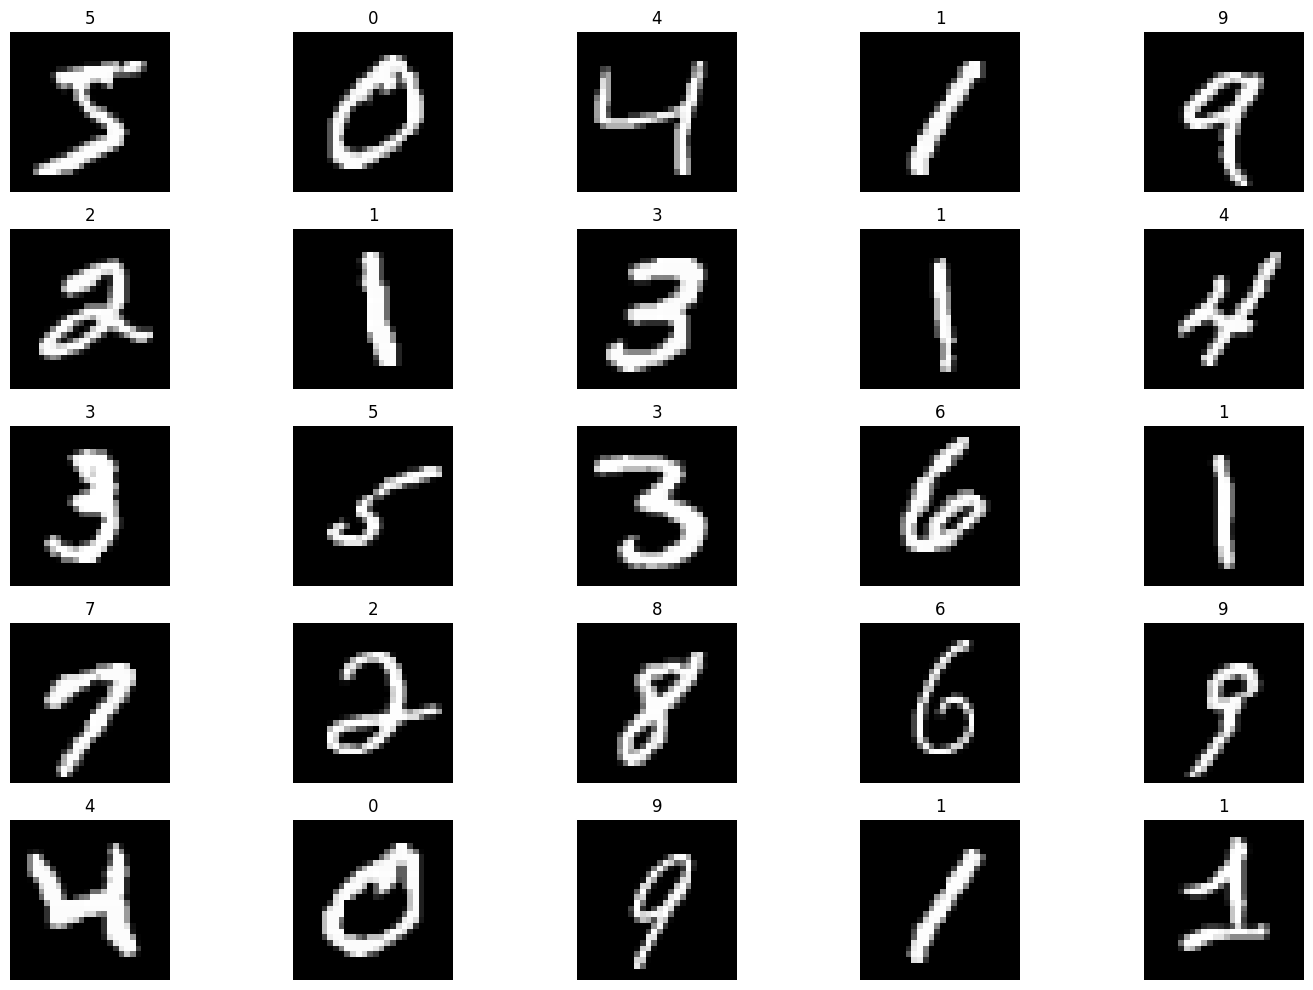

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10 # กำหนดขนาดเริ่มต้นของกราฟที่สร้างด้วย matplotlib
"""
- figure.figsize เป็นคีย์ที่กำหนดขนาดของรูปภาพในหน่วยนิ้ว (inches)
- ค่า (15, 10) หมายถึง ความกว้าง 15 นิ้ว และความสูง 10 นิ้ว
"""

# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(), # แปลงภาพเป็น Tensor และปรับค่าพิกเซลให้อยู่ในช่วง [0.0, 1.0]
	torchvision.transforms.Normalize((0.5), (0.5)) # ปรับค่าใน Tensor ให้มีค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานตามที่กำหนด ((mean), (std))


])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
	root="./MNIST/train", # ระบุโฟลเดอร์ที่ต้องการบันทึกข้อมูล
  train=True, # กำหนดให้โหลดชุดข้อมูลสำหรับฝึก (train)
	transform=torchvision.transforms.ToTensor(), # แปลงภาพเป็น Tensor
	download=True) # ดาวน์โหลดข้อมูลถ้ายังไม่มีในเครื่อง

test_dataset = torchvision.datasets.MNIST(
	root="./MNIST/test", # ระบุโฟลเดอร์ที่ต้องการบันทึกข้อมูล
  train=False, # กำหนดให้โหลดชุดข้อมูลสำหรับทดสอบ (test)
	transform=torchvision.transforms.ToTensor(), # แปลงภาพเป็น Tensor
	download=True) # ดาวน์โหลดข้อมูลถ้ายังไม่มี

# Creating Dataloaders from the training and testing dataset
train_loader = torch.utils.data.DataLoader(
	train_dataset, # ชุดข้อมูลสำหรับฝึก (train dataset)
  batch_size=256) # ขนาดของแต่ละ batch คือ 256 ตัวอย่าง
test_loader = torch.utils.data.DataLoader(
	test_dataset, # ชุดข้อมูลสำหรับการทดสอบ
  batch_size=256) # ขนาดของแต่ละ batch คือ 256 ตัวอย่าง

# Printing 25 random images from the training dataset
random_samples = np.random.randint(
	1, # กำหนดค่าต่ำสุดของช่วงที่สามารถสุ่มได้ (รวม 1 ในผลลัพธ์)
  len(train_dataset), # กำหนดค่าสูงสุดของช่วงที่สามารถสุ่มได้ (แต่ไม่รวมในผลลัพธ์)
  (25)) # กำหนดให้สร้างอาร์เรย์ที่มี 25 ค่า
"""
np.random.randint(low, high, size)
"""

for idx in range(random_samples.shape[0]):
	plt.subplot(5, 5, idx + 1)
	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
	plt.title(train_dataset[idx][1])
	plt.axis('off')

plt.tight_layout() # ปรับระยะห่างระหว่าง subplot เพื่อป้องกันการซ้อนกันของภาพและข้อความ
plt.show() # แสดง grid ของภาพทั้งหมด


# Step 2 : Initializing the Deep Autoencoder model and other hyperrarameters

`torch.nn.Sequential` ใช้สำหรับประกอบ layer หลาย ๆ ชั้นในรูปแบบลำดับ (sequential) ให้ทำงานแบบต่อเนื่อง เรียงตามลำดับที่กำหนด

<hr>

**Encoder**

Ex.

```python
self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 256), # input layer
			torch.nn.ReLU(),
			torch.nn.Linear(256, 128), # hidden layer
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64), # hidden layer
			torch.nn.ReLU(),
			torch.nn.Linear(64, 10) # output layer
		)
```

**กระบวนการของ encoder**
1. รับข้อมูล input ขนาด 28 × 28 = 784
2. ลดขนาดข้อมูลผ่านชั้น Fully Connected (Linear Layers) ตามลำดับ
  * 784 → 256 → 128 → 64 → 10
3. ใช้ฟังก์ชัน activation ReLU ในแต่ละชั้น (ยกเว้นชั้นสุดท้าย) เพื่อเพิ่ม non-linearity
4. ชั้นสุดท้ายลดข้อมูลเหลือขนาด 10 ซึ่งเป็น representation ขนาดย่อของ input

<hr>

**Decoder**

Ex.

```python
self.decoder = torch.nn.Sequential(
			torch.nn.Linear(10, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 28 * 28),
			torch.nn.Sigmoid()
		)
```

**กระบวนการของ decoder**

1. รับ input ขนาด 10 (representation ที่ encoder สร้างขึ้น)
2. ขยายขนาดข้อมูลกลับไปยังขนาดเดิมผ่าน Fully Connected Layers
  * 10 → 64 → 128 → 256 → 784
3. ใช้ฟังก์ชัน activation ReLU ในแต่ละชั้น (ยกเว้นชั้นสุดท้าย)
4. ชั้นสุดท้ายใช้ฟังก์ชัน Sigmoid เพื่อปรับค่าข้อมูลให้อยู่ในช่วง [0, 1] ซึ่งเหมาะสมสำหรับการทำงานกับภาพ grayscale

<hr>

`torch.nn.ReLU(), ` การใช้ ฟังก์ชัน activation (Activation Function) กับข้อมูลในแต่ละ neuron เพื่อให้โมเดลสามารถเรียนรู้และแสดงผลลัพธ์ที่ไม่ใช่เชิงเส้น (non-linear) ได้
* การคำนวณในชั้น fully Connected Layer เป็นการแปล
เชิงเส้น ซึ่งไม่สามารถแยกลักษณะของข้อมูลที่ซับซ้อนได้ เช่น รูปแบบในภาพหรือเสียง ดังนั้น จึงต้องใช้ฟังก์ชัน activation เช่น ReLU หรือ Sigmoid ช่วยเพิ่มความสามารถของโมเดลในการแปลงข้อมูลให้มีความซับซ้อนมากขึ้น โดยเปลี่ยนรูปแบบของข้อมูลในลักษณะที่ไม่ใช่เชิงเส้น
* ถ้าไม่มี Non-linearity การคำนวณหลาย ๆ ชั้นของ Neural Network จะเทียบเท่ากับ ชั้นเดียว เนื่องจากการคำนวณเชิงเส้นหลายครั้งจะรวมเป็นการคำนวณเชิงเส้นครั้งเดียว ดังนั้น Non-linearity ช่วยให้แต่ละ Layer มีหน้าที่เฉพาะตัวและเรียนรู้ข้อมูลในมิติที่หลากหลาย

**Activation Function**

* ReLU (Rectified Linear Unit)
  * เปลี่ยนค่าที่น้อยกว่า 0 เป็น 0
  * ค่าที่มากกว่า 0 คงค่าเดิม
* Sigmoid
  * แปลงค่าให้อยู่ในช่วง [0, 1]

<hr>

**Forward**

Ex.

```python
def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded
```

กระบวนการทำงาน

1. ข้อมูล x ถูกส่งผ่าน encoder เพื่อสร้าง representation (encoded)
2. Representation ถูกส่งผ่าน decoder เพื่อสร้าง output (decoded)
3. Return ค่า output (decoded) ซึ่งควรมีรูปร่างและค่าที่ใกล้เคียงกับ input (x)

<hr>

**หน่วยประมวลผล (neurons)**

แต่ละหน่วยประมวลผลจะรับข้อมูลจากชั้นก่อนหน้า, คูณน้ำหนัก (weights), บวก bias, และส่งผลลัพธ์ผ่านฟังก์ชัน activation ไปยังชั้นถัดไป

**NOTE**

* แต่ละ input neuron จะเชื่อมต่อกับทุก output neuron ผ่านน้ำหนักและ bias
* Hidden Layer : จำนวนหน่วยที่มากขึ้นช่วยให้เครือข่ายเรียนรู้ลักษณะที่ซับซ้อนขึ้น แต่ถ้ามากเกินไปอาจทำให้โมเดลเกิด overfitting
* Output Layer : จำนวนหน่วยในชั้นสุดท้ายมักสอดคล้องกับจำนวนคลาสที่ต้องการจำแนก
* การจัดการพารามิเตอร์
  * จำนวน weights = จำนวน input features x จำนวน neurons
  * จำนวน biases = จำนวน neurons

In [2]:
# Creating a DeepAutoencoder class
class DeepAutoencoder(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 256), # รับข้อมูลขนาด 28 × 28 = 784 (ซึ่งถูกแปลงเป็นเวกเตอร์ 1 มิติ), กำหนดจำนวนหน่วย (neurons)  = 256
			torch.nn.ReLU(), # เพิ่มความไม่เชิงเส้น (non-linearity) โดยกำหนดให้ค่าที่น้อยกว่า 0 กลายเป็น 0
			torch.nn.Linear(256, 128), # รับ input ขนาด 256 (จากชั้นก่อนหน้า), กำหนดจำนวนหน่วย (neurons) = 128 --> ลดขนาดข้อมูลจาก 256 มิติ มาเป็น 128 มิติ
			torch.nn.ReLU(), # เพิ่มความไม่เชิงเส้น (non-linearity) โดยกำหนดให้ค่าที่น้อยกว่า 0 กลายเป็น 0
			torch.nn.Linear(128, 64), # รับ input ขนาด 128 มิติ (จากชั้นก่อนหน้า), กำหนดจำนวนหน่วย (neurons) = 64 --> ลดขนาดข้อมูลจาก 128 มิติ มาเป็น 64 มิติ
			torch.nn.ReLU(), # เพิ่มความไม่เชิงเส้น (non-linearity) โดยกำหนดให้ค่าที่น้อยกว่า 0 กลายเป็น 0
			torch.nn.Linear(64, 10)  # รับ input ขนาด 64 มิติ (จากชั้นก่อนหน้า), กำหนดจำนวนหน่วย (neurons) = 10 --> ลดขนาดข้อมูลจาก 64 มิติ มาเป็น 10 มิติ
		)

		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(10, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded

# Instantiating the model and hyperparameters
model = DeepAutoencoder()
criterion = torch.nn.MSELoss()
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


# Step 3 : Training Loop

`for batch in train_loader:`

batch จะมีค่าดังนี้ : batch = [images, labels]
* images: Tensor ของภาพใน batch
```python
images = [
    [[[0.5, 0.6, 0.7, ..., -0.3],    # Row 1 ของภาพแรก
      [0.4, 0.5, 0.6, ..., -0.4],    # Row 2 ของภาพแรก
      ...,
      [0.2, 0.3, 0.1, ..., -0.2]]],  # Row 28 ของภาพแรก

    [[[0.1, 0.2, 0.3, ..., -0.1],    # Row 1 ของภาพที่สอง
      [0.0, 0.1, 0.2, ..., -0.2],    # Row 2 ของภาพที่สอง
      ...,
      [0.1, 0.0, 0.1, ...,  0.2]]],

    ...

    [[[0.3, 0.4, 0.5, ...,  0.2],    # Row 1 ของภาพที่ 256
      [0.2, 0.3, 0.4, ..., -0.1],    # Row 2 ของภาพที่ 256
      ...,
      [0.0, 0.1, 0.2, ...,  0.1]]]
]
```

* labels: Tensor ของ label ที่สอดคล้องกับแต่ละภาพใน batch
```python
labels = [5, 0, 3, 7, 1, 2, 8, 4, 6, 9, ...]  # ขนาด [256]
```

<hr>

`img = img.reshape(-1, 28*28)`

* ตัวเลข -1 ใน reshape หมายถึงให้ PyTorch คำนวณขนาดในมิติที่เหลือโดยอัตโนมัติ

  * -1 = จำนวนข้อมูลทั้งหมด / ผลคูณของมิติที่ระบุ
  *ผลคูณของขนาดในมิติใหม่ ต้องเท่ากับ จำนวนข้อมูลทั้งหมดใน Tensor เดิม

Ex. img มี shape เริ่มต้นเป็น [256, 1, 28, 28]

จาก img = img.reshape(-1, 28*28)

-1 = (256*1*28*28) / 784 => 256

จะได้ shape ใหม่ ที่มี เวกเตอร์ 1 มิติ คือ [256, 784]

**จุดประสงค์**
* เลเยอร์ torch.nn.Linear ต้องการ input เป็นเวกเตอร์ 1 มิติ
* การใช้ -1 ทำให้รองรับ batch ขนาดใดก็ได้ โดยไม่ต้องกำหนด batch size คงที่

<hr>

**ตัวอย่างค่า loss ที่ได้**
```python
tensor(0.0050, grad_fn=<MseLossBackward>)
```

การใช้ loss.item() จะได้ 0.0050

<hr>

`outputs[epoch+1] = {'img': img, 'out': out}`

* epoch+1 : ใช้เป็น key เพื่อระบุ epoch ที่บันทึกข้อมูล โดยเริ่มต้นที่ 1 แทน 0 (สำหรับการอ่านค่าที่เข้าใจง่าย)
* img : ข้อมูลภาพต้นฉบับที่ถูกส่งเข้าโมเดล
* out : ผลลัพธ์ที่โมเดลสร้างขึ้น (reconstructed images)
  * ขนาดของ out ควรเหมือนกับ img

**ตัวอย่างผลลัพธ์**
```python
{
    1: {'img': tensor([[...], [...]]), 'out': tensor([[...], [...]])},  # Epoch 1
    2: {'img': tensor([[...], [...]]), 'out': tensor([[...], [...]])},  # Epoch 2
    3: {'img': tensor([[...], [...]]), 'out': tensor([[...], [...]])},  # Epoch 3
}
```

<hr>

NOTE : ถ้า num_epochs มีค่ามาก เช่น 100 หรือ 1000 Matplotlib จะพยายามจัดระยะ (ticks) บนแกน x อัตโนมัติ เพื่อให้กราฟดูอ่านง่าย

แทนที่จะใส่ตัวเลขทุกค่า (1, 2, 3, ..., num_epochs) Matplotlib จะเลือกแสดงเฉพาะบางค่าที่เหมาะสม เช่น 0, 20, 40, 60, ....

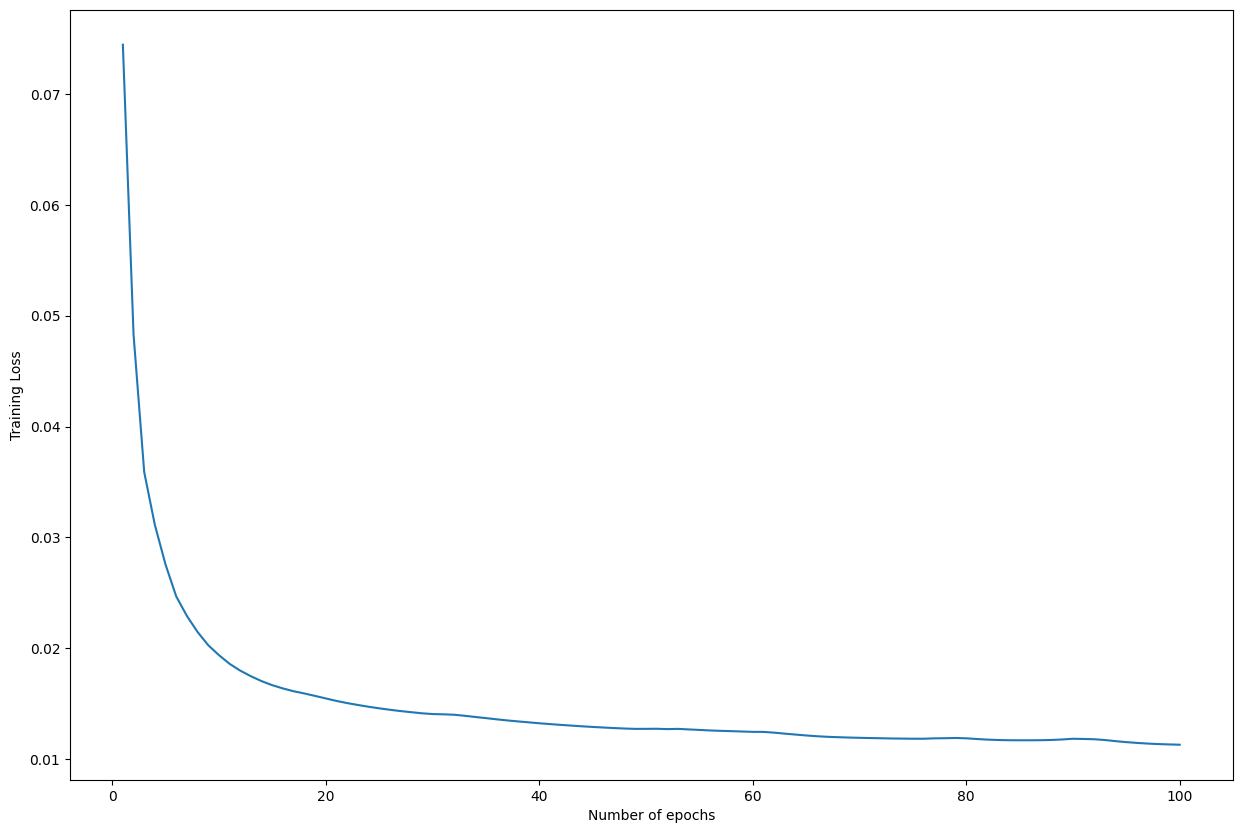

In [3]:
# List that will store the training loss
train_loss = [] # เก็บค่าการสูญเสีย (loss) ที่คำนวณในแต่ละ epoch

# Dictionary that will store the different images and outputs for various epochs
outputs = {} # เก็บภาพต้นฉบับ (img) และภาพที่สร้างใหม่ (out) สำหรับแต่ละ epoch

batch_size = len(train_loader)

# Training loop starts
for epoch in range(num_epochs):

	# Initializing variable for storing loss
	running_loss = 0

	# Iterating over the training dataset
	for batch in train_loader:

		# Loading image(s) and reshaping it into a 1-d vector
		img, _ = batch
		img = img.reshape(-1, 28*28) # ปรับรูปทรง (shape) ของ Tensor ให้มีมีรูปทรงเป็นเวกเตอร์แบบ 1 มิติ

		# Generating output
		out = model(img)

		# Calculating loss
		loss = criterion(out, img) # criterion(ค่าที่โมเดลทำนาย, ค่าที่แท้จริงที่ต้องการให้โมเดลเรียนรู้)

		# Updating weights according to the calculated loss
		optimizer.zero_grad() # ลบค่าของ Gradient ที่คำนวณในรอบก่อนหน้าเพื่อป้องกันการสะสมค่า Gradient
		loss.backward() # คำนวณ Gradient ของฟังก์ชัน Loss และบันทึก Gradient ลงในพารามิเตอร์ของโมเดล (Weights และ Biases)
		optimizer.step() # ใช้ Gradient ที่คำนวณได้เพื่ออัปเดตค่าพารามิเตอร์ของโมเดลด้วยเทคนิค Gradient Descent

		# Incrementing loss
		running_loss += loss.item() #สะสมค่า Loss รวมของทุก batch ใน 1 epoch

	# Averaging out loss over entire batch
	running_loss /= batch_size # ผลลัพธ์ของการหารจะถูกเก็บกลับเข้าไปในตัวแปร running_loss
	train_loss.append(running_loss)

	# Storing useful images and reconstructed outputs for the last batch
	outputs[epoch+1] = {'img': img, 'out': out}


# Plotting the training loss
plt.plot(range(1,num_epochs+1),train_loss) # สร้างกราฟการเปลี่ยนแปลงของค่า Loss ระหว่างการฝึกในแต่ละ epoch
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()


# Step 4 : Visualizing the reconstruction

`temp = outputs[val]['out'].detach().numpy()`

* .detach()
  * ใช้เพื่อแยก Tensor ออกจาก computational graph ทำให้ Tensor ไม่เกี่ยวข้องกับการคำนวณ Gradient
* .numpy()
  * แปลง Tensor ที่แยกแล้วให้อยู่ในรูปแบบ NumPy array ใช้สำหรับการแสดงผลหรือการประมวลผลเพิ่มเติมด้วยเครื่องมืออื่นที่รองรับ NumPy

Ex.

ก่อนใช้ .detach()

```python
tensor([[0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]], grad_fn=<MulBackward0>)
```

หลังใช้ .detach()

```python
tensor([[0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]])

```

หลังใช้ numpy()

```python
array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6],
       [0.7, 0.8, 0.9]])

```

<hr>

`plt.subplot(7, 5, counter)` => plt.subplot(nrows, ncols, index)

* สร้าง subplot มีขนาด 7 แถว × 5 คอลัมน์ (รวม 35 ช่อง)
* index: ตำแหน่ง subplot ที่ต้องการวาดภาพ (นับจากซ้ายไปขวา, บนลงล่าง)

`plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')`

* temp[idx] : เลือกภาพที่ตำแหน่ง idx ใน Tensor temp ซึ่งควรเป็น Tensor ที่มีขนาด [batch_size, 784] เช่น [256, 784]
* .reshape(28,28) : แปลงภาพจากเวกเตอร์ขนาด [784] กลับเป็นภาพ 2D ขนาด [28, 28]
* cmap='gray' : กำหนด colormap ของภาพให้เป็น grayscale (เฉดสีดำ-ขาว)

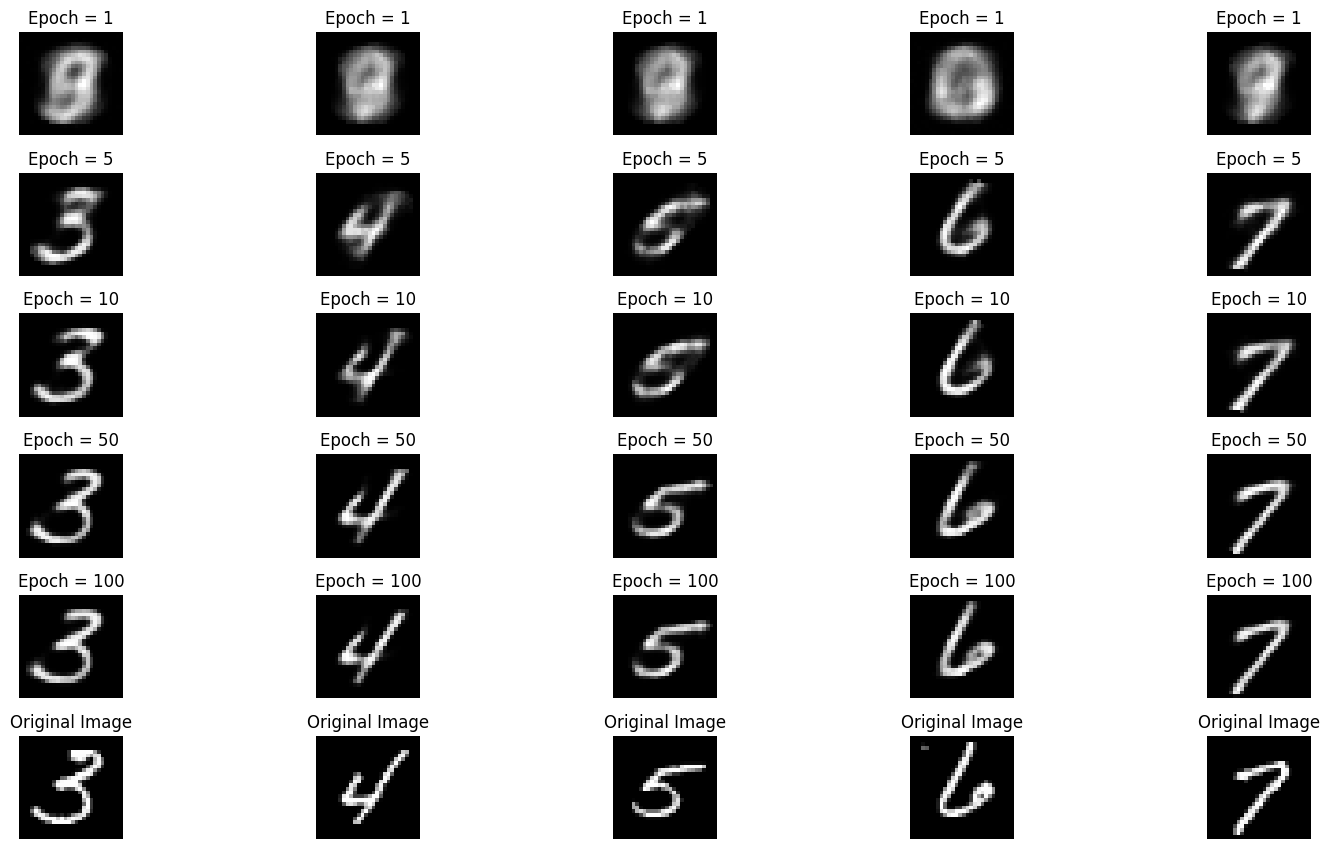

In [4]:
# Plotting is done on a 7x5 subplot
# Plotting the reconstructed images

# Initializing subplot counter
counter = 1

# Plotting reconstructions for epochs = [1, 5, 10, 50, 100]
epochs_list = [1, 5, 10, 50, 100]

# Iterating over specified epochs
for val in epochs_list:

	# Extracting recorded information
	temp = outputs[val]['out'].detach().numpy()
	title_text = f"Epoch = {val}"

	# Plotting first five images of the last batch
	for idx in range(5):
		plt.subplot(7, 5, counter)
		plt.title(title_text)
		plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')
		plt.axis('off')

		# Incrementing the subplot counter
		counter+=1

# Plotting original images

# Iterating over first five images of the last batch
for idx in range(5):

	# Obtaining image from the dictionary
	val = outputs[10]['img']

	# Plotting image
	plt.subplot(7,5,counter)
	plt.imshow(val[idx].reshape(28, 28),
			cmap = 'gray')
	plt.title("Original Image")
	plt.axis('off')

	# Incrementing subplot counter
	counter+=1

plt.tight_layout()
plt.show()


# Step 5 : Checking performance on the test set

`list(test_loader)[-1]`

* test_loader : เป็น DataLoader สำหรับชุดข้อมูลทดสอบ (test dataset) ที่กำหนดไว้
* list(test_loader) : แปลง DataLoader เป็นรายการ (list) ที่เก็บ batch ทั้งหมดใน test dataset
* [-1]: เลือก batch สุดท้ายใน list

Ex.

```python
list(test_loader) = [batch1, batch2, batch3, batch4]
```

* list(test_loader)[-1] จะดึง batch4

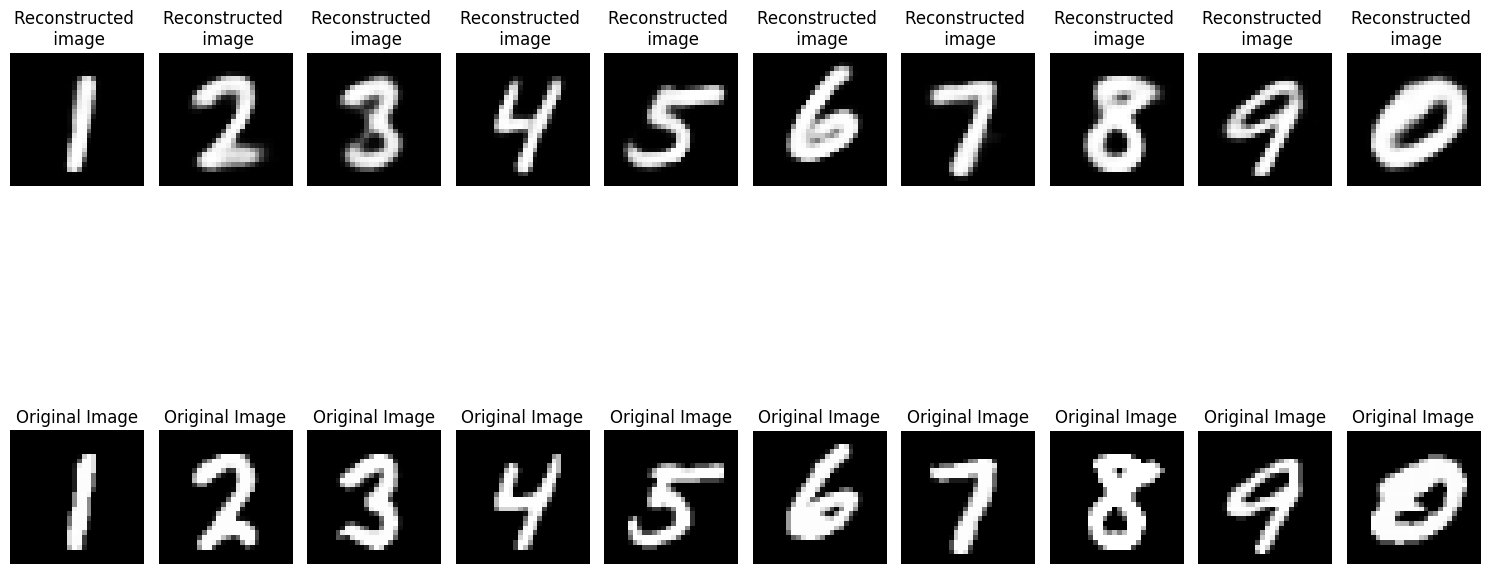

In [5]:
# Dictionary that will store the different images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test dataset
img, _ = list(test_loader)[-1]

# Reshaping into 1d vector
img = img.reshape(-1, 28 * 28)

# Generating output for the obtained batch
out = model(img)

# Storing information in dictionary
outputs['img'] = img
outputs['out'] = out

# Plotting reconstructed images
# Initializing subplot counter
counter = 1
val = outputs['out'].detach().numpy()

# Plotting first 10 images of the batch
for idx in range(10):
	plt.subplot(2, 10, counter)
	plt.title("Reconstructed \n image")
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

# Plotting original images

# Plotting first 10 images
for idx in range(10):
	val = outputs['img']
	plt.subplot(2, 10, counter)
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.title("Original Image")
	plt.axis('off')

	# Incrementing subplot counter
	counter += 1

plt.tight_layout()
plt.show()
